<h1><center><font color=blue>**Leading the March to Madness**</font></center></h1>
<h3><center>General Assembly Data Science Immersive Capstone Project</center></h3> 
<h4><center>Data and Description at https://www.kaggle.com/c/mens-machine-learning-competition-2018</center></h4>

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn import preprocessing, metrics, svm, ensemble
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix

In [9]:
df_predictions_tourney = pd.read_csv('./data/features.csv', index_col=0)
df_tourney_final = pd.read_csv('./data/df_tourney_final.csv', index_col=0)
df_sample_sub = pd.read_csv('./data/SampleSubmissionStage2.csv')

In [10]:
df_predictions_tourney.head()

,Seed,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,...,Luck,AdjEM_SOS,OppO_SOS,OppD_SOS,AdjEM_NCSOS,Season_ELO,result,Season,WTeamID,LTeamID
0,0,-18.0,-0.065855,0.052546,-0.023263,0.028533,-0.055467,0.012589,13.613617,19.954684,...,0.001,16.51,12.8,-3.7,13.23,131.501230,1,2005,1324,1105
1,13,127.0,-0.031576,-0.073963,0.020017,-0.038345,0.071169,-0.021575,-18.781055,-8.788508,...,0.022,-14.34,-7.7,6.7,-6.81,-510.831761,0,2005,1329,1368
2,15,215.0,-0.193842,-0.052560,-0.029080,-0.057046,-0.068337,-0.049954,-9.535419,19.756223,...,-0.033,-9.65,-3.5,6.1,10.11,-536.664569,0,2005,1314,1324
3,-3,-55.0,-0.005031,-0.039170,-0.007003,0.045268,0.015982,-0.005968,-2.974829,-0.596986,...,0.104,-6.37,-3.4,2.9,2.08,-99.309868,0,2005,1301,1150
4,-1,9.0,-0.055364,-0.021140,-0.009435,-0.058021,-0.035476,-0.027740,-3.497655,2.884055,...,0.011,1.98,0.6,-1.3,5.98,-6.396041,0,2005,1280,1390


#### Here we will split the dataFrame into its various components for Machine Learning

In [11]:
labels = df_predictions_tourney['result']
IDs = df_predictions_tourney.iloc[:, 25:]
features = df_predictions_tourney.iloc[:, 0:24]
features.head()

,Seed,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,...,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM_SOS,OppO_SOS,OppD_SOS,AdjEM_NCSOS,Season_ELO
0,0,-18.0,-0.065855,0.052546,-0.023263,0.028533,-0.055467,0.012589,13.613617,19.954684,...,11.29,17.6,6.4,-7.6,0.001,16.51,12.8,-3.7,13.23,131.501230
1,13,127.0,-0.031576,-0.073963,0.020017,-0.038345,0.071169,-0.021575,-18.781055,-8.788508,...,-21.82,-24.1,-2.3,-6.2,0.022,-14.34,-7.7,6.7,-6.81,-510.831761
2,15,215.0,-0.193842,-0.052560,-0.029080,-0.057046,-0.068337,-0.049954,-9.535419,19.756223,...,-33.97,-14.4,19.6,-7.9,-0.033,-9.65,-3.5,6.1,10.11,-536.664569
3,-3,-55.0,-0.005031,-0.039170,-0.007003,0.045268,0.015982,-0.005968,-2.974829,-0.596986,...,-6.78,-3.4,3.4,7.5,0.104,-6.37,-3.4,2.9,2.08,-99.309868
4,-1,9.0,-0.055364,-0.021140,-0.009435,-0.058021,-0.035476,-0.027740,-3.497655,2.884055,...,-4.62,-2.7,1.9,-1.0,0.011,1.98,0.6,-1.3,5.98,-6.396041


#### We will reserve the 2018 data as our true test set for submission to Kaggle

In [12]:
labels_submission = df_predictions_tourney['result'][df_predictions_tourney['Season'] == 2018]
IDs_submission = df_predictions_tourney.iloc[1426:, 25:]
features_submission = df_predictions_tourney.iloc[1426:,  0:24]

#### The following will be our training set

In [13]:
y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2018]
IDs_training = df_predictions_tourney.iloc[:1426, 25:]
X = df_predictions_tourney.iloc[:1426, 0:24]

#### Since we obviously have just one winner and one loser for all games, baseline accuracy is 50%.

In [14]:
print('Baseline accuracy is', y.value_counts(normalize=True).sort_values().values[-1]*100)

Baseline accuracy is 50.0


In [15]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

## Logistic Regression

In [17]:
%%time
lr =GridSearchCV(
    LogisticRegression(),
    {
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 10, 100, 1000],
        'fit_intercept':[True, False]

    },
    scoring = 'neg_log_loss'
).fit(X_train, y_train)

Wall time: 12.2 s


In [18]:
y_lr_pred = lr.predict(X_test)
train_acc = accuracy_score(y_true=y_train, y_pred=lr.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=lr.predict(X_test))

Best paramaters are  {'C': 1000, 'fit_intercept': False, 'penalty': 'l1'}
Testing log loss score is 0.34%
Best log loss score is 0.40%
Training Accuracy is 84.38%
Test Accuracy is 85.58%
Confusion Matrix:
[[84 20]
 [10 94]]
Classification Report:
             precision    recall  f1-score   support

       Loss       0.89      0.81      0.85       104
        Win       0.82      0.90      0.86       104

avg / total       0.86      0.86      0.86       208



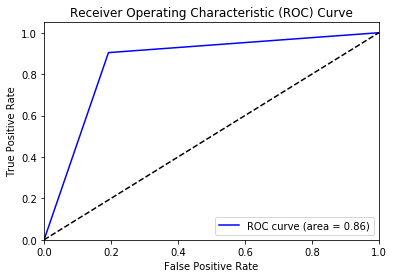

In [19]:
print('Best paramaters are ', lr.best_params_)
print('Testing log loss score is %.2f%%' % -lr.score(X_test, y_test))
print('Best log loss score is %.2f%%' % -lr.best_score_)
print('Training Accuracy is %.2f%%' % (100 * train_acc))
print('Test Accuracy is %.2f%%' % (100 * test_acc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('Classification Report:')
print(classification_report(y_test, 
                    y_lr_pred,
                    labels=lr.classes_,
                    target_names = ['Loss', 'Win']))
fpr, tpr, _ = roc_curve(y_test, lr.predict(X_test))

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [20]:
%%time

rf =GridSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators' : list(range(1,20)),
        'min_samples_leaf' : list(range(1,20)),
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'log2'],
        'bootstrap': [True, False]
    
    }, scoring = 'neg_log_loss'
).fit(X_train, y_train)

Wall time: 5min 48s


In [23]:
y_rf_pred = rf.predict(X_test)
train_acc = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

Best paramaters are  {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 19, 'n_estimators': 9}
Testing log loss score is 0.53%
Best log loss score is 0.51%
Training Accuracy is 79.93%
Test Accuracy is 74.04%
Confusion Matrix:
[[69 35]
 [19 85]]
Classification Report:
             precision    recall  f1-score   support

       Loss       0.78      0.66      0.72       104
        Win       0.71      0.82      0.76       104

avg / total       0.75      0.74      0.74       208



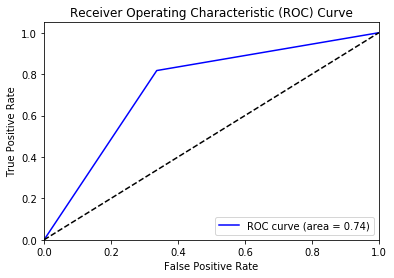

In [24]:
print('Best paramaters are ', rf.best_params_)
print('Testing log loss score is %.2f%%' % -rf.score(X_test, y_test))
print('Best log loss score is %.2f%%' % -rf.best_score_)
print('Training Accuracy is %.2f%%' % (100 * train_acc))
print('Test Accuracy is %.2f%%' % (100 * test_acc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf.predict(X_test)))
print('Classification Report:')
print(classification_report(y_test, 
                    y_rf_pred,
                    labels=rf.classes_,
                    target_names = ['Loss', 'Win']))

fpr, tpr, _ = roc_curve(y_test, rf.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

In [25]:
%%time

knn =GridSearchCV(
    KNeighborsClassifier(),
    {
        'n_neighbors': list(range(1,20)),
        'p': [1, 2],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'weights': ['uniform', 'distance']
    }, scoring = 'neg_log_loss'
).fit(X_train, y_train)

Wall time: 31.6 s


In [26]:
y_knn_pred = knn.predict(X_test)
train_acc = accuracy_score(y_true=y_train, y_pred=knn.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=knn.predict(X_test))

Best paramaters are  {'algorithm': 'auto', 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Testing log loss score is 0.69%
Best log loss score is 0.60%
Training Accuracy is 100.00%
Test Accuracy is 73.08%
Confusion Matrix:
[[72 32]
 [24 80]]
Classification Report:
             precision    recall  f1-score   support

       Loss       0.75      0.69      0.72       104
        Win       0.71      0.77      0.74       104

avg / total       0.73      0.73      0.73       208



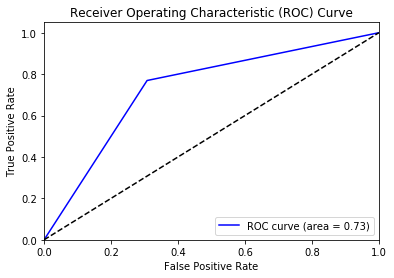

In [27]:
print('Best paramaters are ', knn.best_params_)
print('Testing log loss score is %.2f%%' % -knn.score(X_test, y_test))
print('Best log loss score is %.2f%%' % -knn.best_score_)
print('Training Accuracy is %.2f%%' % (100 * train_acc))
print('Test Accuracy is %.2f%%' % (100 * test_acc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn.predict(X_test)))
print('Classification Report:')
print(classification_report(y_test, 
                    y_knn_pred,
                    labels=knn.classes_,
                    target_names = ['Loss', 'Win']))

fpr, tpr, _ = roc_curve(y_test, knn.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [28]:
%%time

xgb =GridSearchCV(
    XGBClassifier(),
    {
        'learning_rate' : [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_depth': list(range(1,10)),
        'min_child_weight': list(range(1, 3)),
        'n_estimators': list(range(75,125)),
        'booster': ['gbtree', 'gblinear', 'dart']
    }, scoring = 'neg_log_loss'
).fit(X_train, y_train)

Wall time: 1h 40min 55s


In [29]:
y_xgb_pred = xgb.predict(X_test)
train_acc = accuracy_score(y_true=y_train, y_pred=xgb.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=xgb.predict(X_test))

Best paramaters are  {'booster': 'gblinear', 'learning_rate': 0.9, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 79}
Testing log loss score is 0.36%
Best log loss score is 0.41%
Training Accuracy is 82.93%
Test Accuracy is 84.13%
Confusion Matrix:
[[83 21]
 [12 92]]
Classification Report:
             precision    recall  f1-score   support

       Loss       0.87      0.80      0.83       104
        Win       0.81      0.88      0.85       104

avg / total       0.84      0.84      0.84       208



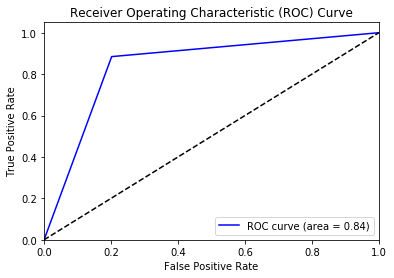

In [30]:
print('Best paramaters are ', xgb.best_params_)
print('Testing log loss score is %.2f%%' % -xgb.score(X_test, y_test))
print('Best log loss score is %.2f%%' % -xgb.best_score_)
print('Training Accuracy is %.2f%%' % (100 * train_acc))
print('Test Accuracy is %.2f%%' % (100 * test_acc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, xgb.predict(X_test)))
print('Classification Report:')
print(classification_report(y_test, 
                    y_xgb_pred,
                    labels=xgb.classes_,
                    target_names = ['Loss', 'Win']))

fpr, tpr, _ = roc_curve(y_test, xgb.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

In [31]:
%%time

dt =GridSearchCV(
    DecisionTreeClassifier(),
    {
        'max_depth': list(range(1, 5)),
        'criterion': ['gini', 'entropy'],
        'min_samples_split' : [2, 3],
        'min_samples_leaf' : list(range(1,20)),
        'max_features': ['auto', 'log2', 'sqrt']
    }, scoring = 'neg_log_loss'
).fit(X_train, y_train)

Wall time: 12.1 s


In [32]:
y_dt_pred = dt.predict(X_test)
train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))

Best paramaters are  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 3}
Testing log loss score is 0.76%
Best log loss score is 0.54%
Training Accuracy is 69.95%
Test Accuracy is 71.15%
Confusion Matrix:
[[73 31]
 [29 75]]
Classification Report:
             precision    recall  f1-score   support

       Loss       0.72      0.70      0.71       104
        Win       0.71      0.72      0.71       104

avg / total       0.71      0.71      0.71       208



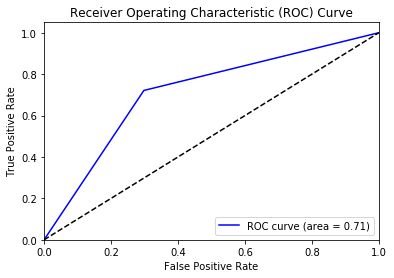

In [33]:
print('Best paramaters are ', dt.best_params_)
print('Testing log loss score is %.2f%%' % -dt.score(X_test, y_test))
print('Best log loss score is %.2f%%' % -dt.best_score_)
print('Training Accuracy is %.2f%%' % (100 * train_acc))
print('Test Accuracy is %.2f%%' % (100 * test_acc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('Classification Report:')
print(classification_report(y_test, 
                    y_dt_pred,
                    labels=dt.classes_,
                    target_names = ['Loss', 'Win']))

fpr, tpr, _ = roc_curve(y_test, dt.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Classifier

In [34]:
%%time

gb =GridSearchCV(
    GradientBoostingClassifier(),
    {
        'learning_rate' : [0.01, 0.1, 1, 10, 100],
        'loss' : ['deviance','exponential'],
        'max_depth': list(range(2, 10))
    }, scoring = 'neg_log_loss'
).fit(X_train, y_train)

Wall time: 1min 27s


In [35]:
y_gb_pred = gb.predict(X_test)
train_acc = accuracy_score(y_true=y_train, y_pred=gb.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=gb.predict(X_test))

Best paramaters are  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2}
Testing log loss score is 0.48%
Best log loss score is 0.52%
Training Accuracy is 87.02%
Test Accuracy is 76.92%
Confusion Matrix:
[[75 29]
 [19 85]]
Classification Report:
             precision    recall  f1-score   support

       Loss       0.80      0.72      0.76       104
        Win       0.75      0.82      0.78       104

avg / total       0.77      0.77      0.77       208



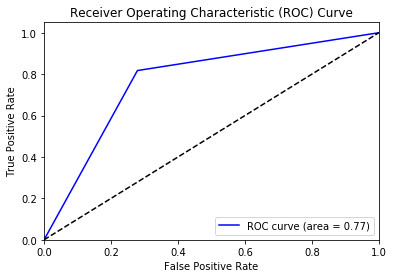

In [36]:
print('Best paramaters are ', gb.best_params_)
print('Testing log loss score is %.2f%%' % -gb.score(X_test, y_test))
print('Best log loss score is %.2f%%' % -gb.best_score_)
print('Training Accuracy is %.2f%%' % (100 * train_acc))
print('Test Accuracy is %.2f%%' % (100 * test_acc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, gb.predict(X_test)))
print('Classification Report:')
print(classification_report(y_test, 
                    y_gb_pred,
                    labels=gb.classes_,
                    target_names = ['Loss', 'Win']))

fpr, tpr, _ = roc_curve(y_test, gb.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### The following code is taken from the Kaggle Starter Kernel that grabs the teams info, the probable games played between the two teams to help match those games with the probabilities calculated by the models.

In [ ]:
#steps for grabbing teams info and creating the input for the model

n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

X_test = np.zeros(shape=(n_test_games, 1))
column = df_tourney_final.columns.get_values()
model = []
data = []

for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[(df_tourney_final.TeamID == t1) & (df_tourney_final.Season == year)].values
    team2 = df_tourney_final[(df_tourney_final.TeamID == t2) & (df_tourney_final.Season == year)].values
    
    model = team1 - team2
    
    data.append(model)

In [ ]:
Predictions = pd.DataFrame(np.array(data).reshape(2278, 26), columns = (column))

Predictions.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)

Predictions.head()

#### The next step generate the predictions and puts it into the submission file for upload to Kaggle.

In [ ]:
#generate the predictions

preds = gs.predict_proba(Predictions)[:,1]

df_sample_sub['Pred'] = preds
df_sample_sub.head()